# Solcast project - data visualization project

As part of the Solcast project, I worked on daily radiations for Boulogne - Billancourt (greater Paris).
In the current notebook, I visualize data and variables in order to gain some insights

##Instalation

In [ ]:
# Install Gitly in render Plotly graphs on Github
%pip install gitly

## Import required libraries and packages

In [2]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from gitly.colab.plot import GitlyPlotter # Only imported to view Plotly graphs on Github
%matplotlib inline

In [3]:
# Run this command only if you are using Google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Create the dataset
df = pd.read_csv("/content/drive/MyDrive/solarcast_df_clean281221.csv",index_col=0)

In [5]:
# Check the first rows of our dataset
df.head(5)

MonthPE        Date  Season  ...  Daily_DNI  Daily_GHI  Daily_radiation
2018-12-31       12  2018-12-31  Winter  ...   0.000000  34.444444        34.444444
2019-01-01        1  2019-01-01  Winter  ...   0.000000  35.888889        35.888889
2019-01-02        1  2019-01-02  Winter  ...  10.444444  67.000000        66.222222
2019-01-03        1  2019-01-03  Winter  ...  22.111111  83.666667        81.777778
2019-01-04        1  2019-01-04  Winter  ...  33.777778  65.222222        58.222222

[5 rows x 12 columns]

## I- Data visualization

### a) Monovariate analysis

Let us create a list containing all the numerical variables except Date and MonthPE. We will use this list to create visualizations

In [6]:
# Create a list with all the variables
num_col = list(df.columns)

In [7]:
# Remove variables we do not wish to plot from our numerical variables list
num_col.remove('MonthPE')
num_col.remove('Date')
num_col.remove('Season')

***Bar plots***

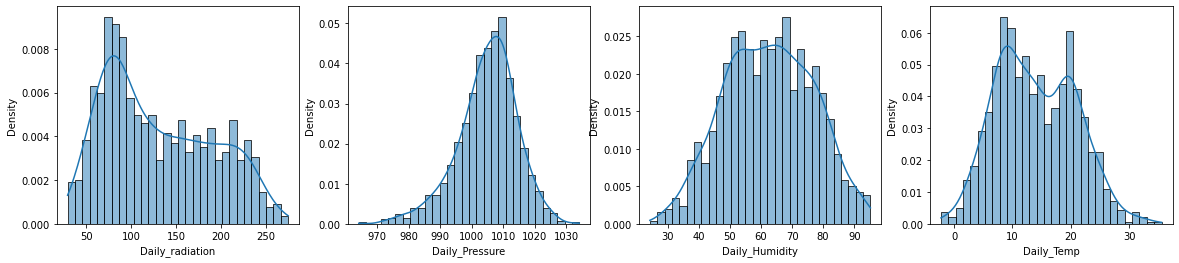

In [8]:
# Plot histograms
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(df['Daily_radiation'], stat="density", kde=True, bins=30, ax=ax[0])
sns.histplot(df['Daily_Pressure'], stat="density",kde=True, bins=30, ax=ax[1])
sns.histplot(df['Daily_Humidity'], stat="density", kde=True, bins=30, ax=ax[2])
sns.histplot(df['Daily_Temp'], stat="density", kde=True, bins=30, ax=ax[3])
plt.show()

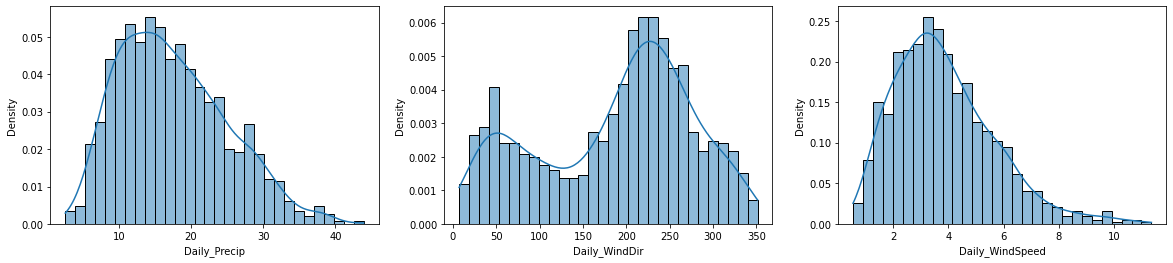

In [9]:
# Plot histograms
f, ax = plt.subplots(1, 3, figsize=(20,4))
sns.histplot(df['Daily_Precip'], stat="density", kde=True, bins=30, ax=ax[0])#ADDED
sns.histplot(df['Daily_WindDir'], stat="density", kde=True, bins=30, ax=ax[1])
sns.histplot(df['Daily_WindSpeed'], stat="density", kde=True, bins=30, ax=ax[2])
plt.show()

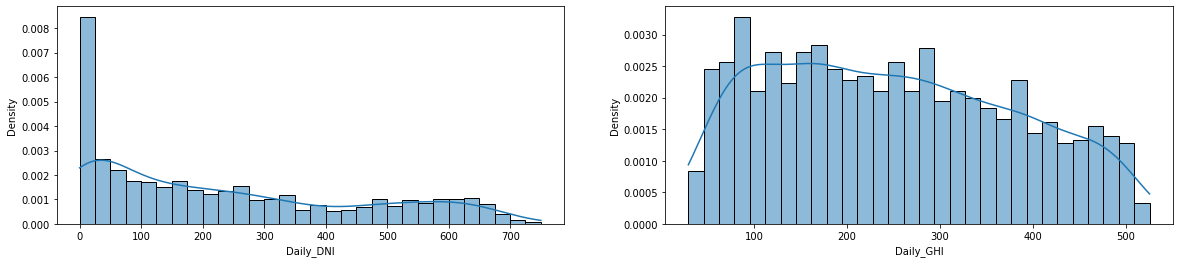

In [10]:
# Plot histograms
f, ax = plt.subplots(1, 2, figsize=(20,4))
sns.histplot(df['Daily_DNI'], stat="density", kde=True, bins=30, ax=ax[0])
sns.histplot(df['Daily_GHI'], stat="density", kde=True, bins=30, ax=ax[1])
#GHI
plt.show()

Daily humidity and daily pressure follow an almost normal distribution. However other features are right skewed.

***Time series plots***

In [11]:
# Instatiate gitly as a object of GitlyPlotter: Parameters for the constructor could be git, github or colab
gitly = GitlyPlotter('github')

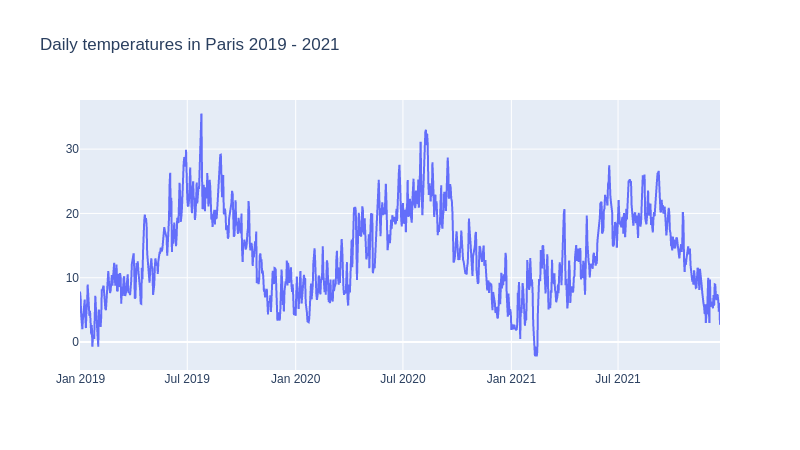

In [12]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_Temp'])])
fig.update_layout(title="Daily temperatures in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

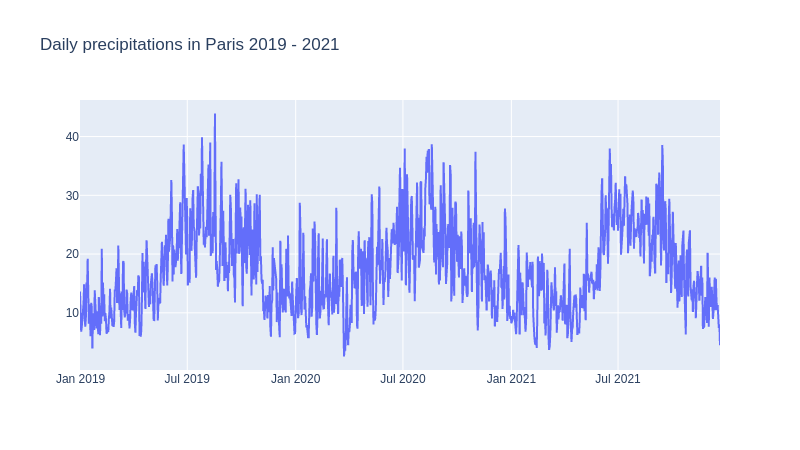

In [13]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_Precip'])])
fig.update_layout(title="Daily precipitations in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

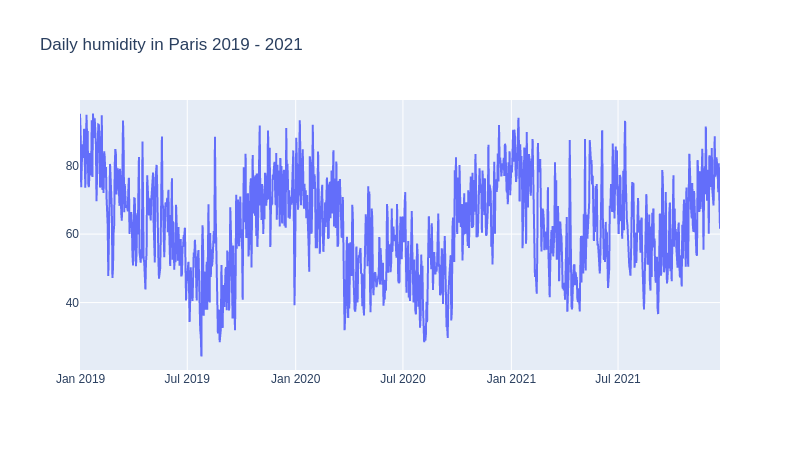

In [14]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_Humidity'])])
fig.update_layout(title="Daily humidity in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

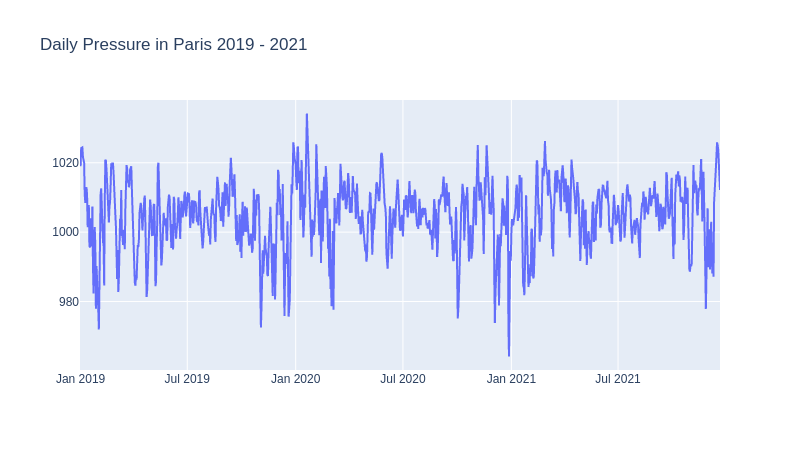

In [15]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_Pressure'])])
fig.update_layout(title="Daily Pressure in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

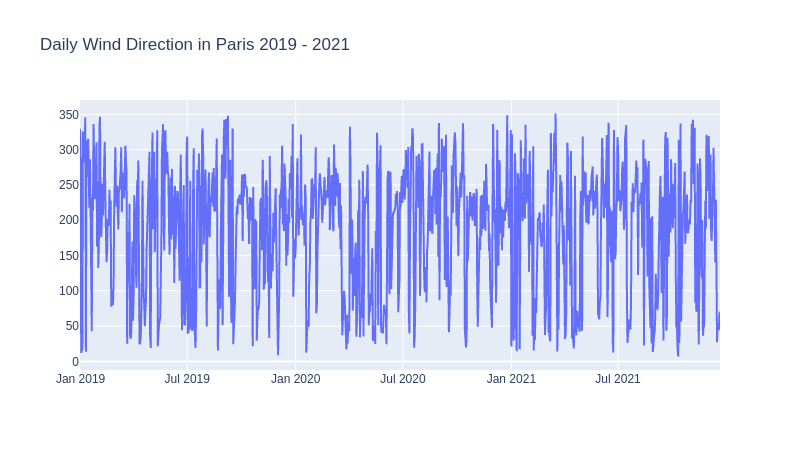

In [16]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_WindDir'])])
fig.update_layout(title="Daily Wind Direction in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

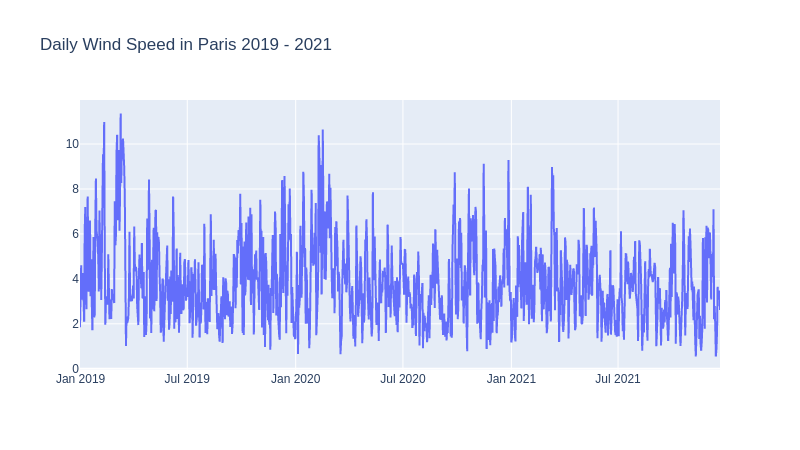

In [17]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_WindSpeed'])])
fig.update_layout(title="Daily Wind Speed in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

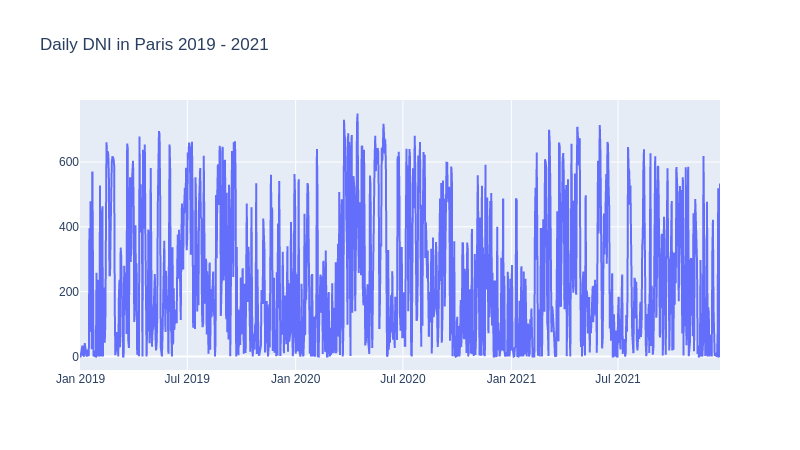

In [18]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_DNI'])])
fig.update_layout(title="Daily DNI in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

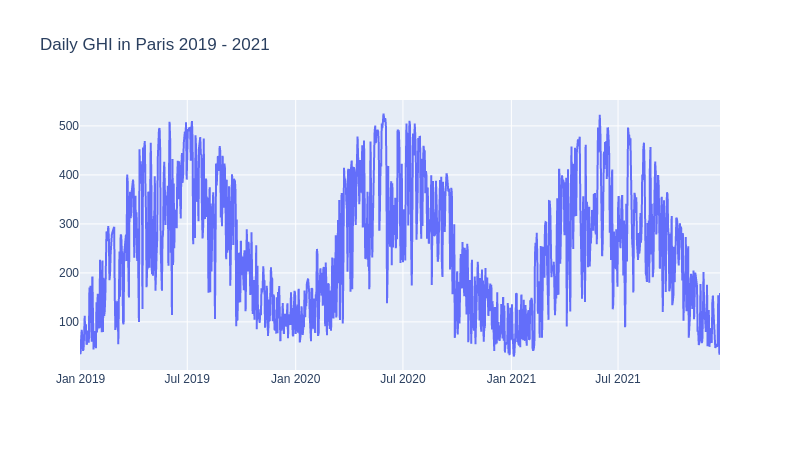

In [19]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_GHI'])])
fig.update_layout(title="Daily GHI in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

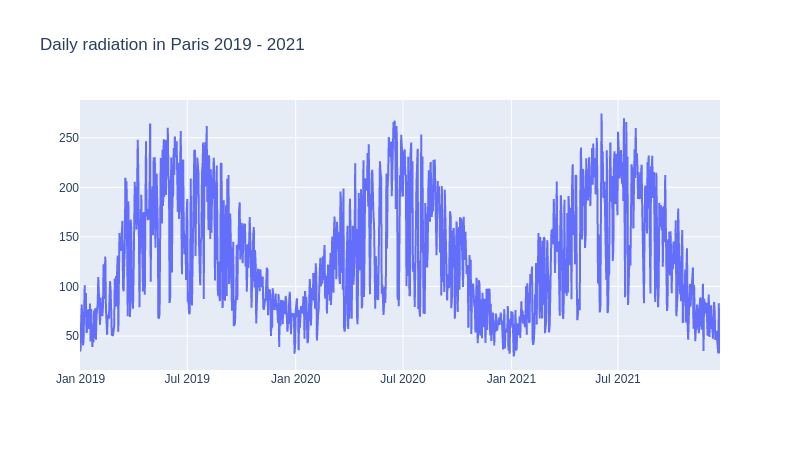

In [20]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Daily_radiation'])])
fig.update_layout(title="Daily radiation in Paris 2019 - 2021")
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

Among our features, we notice that some features seems to be seasonal:
-  Daily GHI
- Daily Radiation
- Daily temperatures
- Daily precipitations
- Daily humidity

### b) Bivariate and multivariate analysis

***Features vs Radiation***

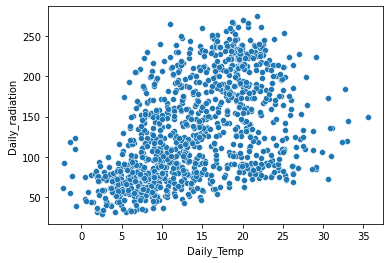

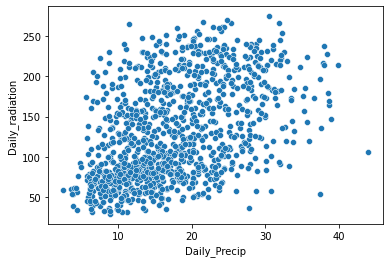

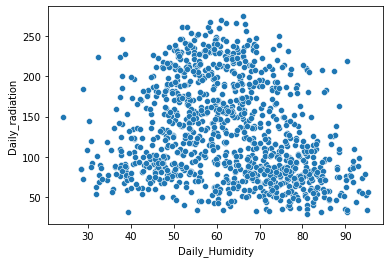

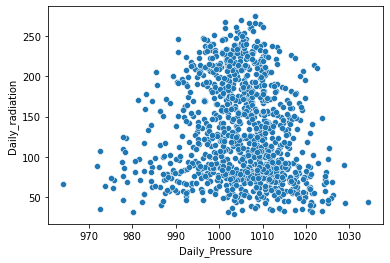

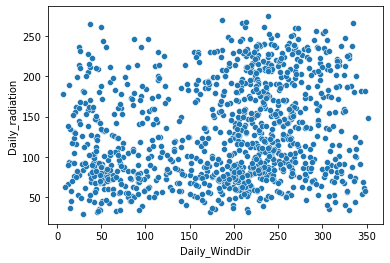

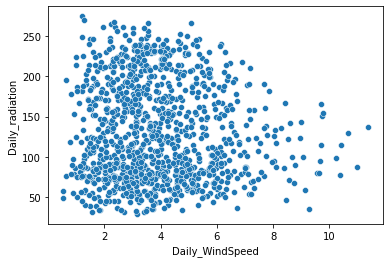

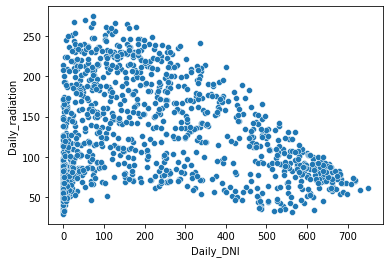

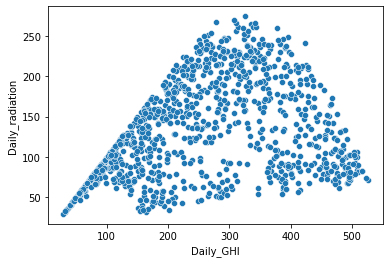

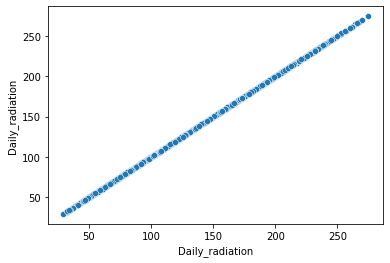

In [21]:
# Create scatter plot for all the variables vs Daily radiations
for i in num_col:
    sns.scatterplot(data=df, x=i, y='Daily_radiation')
    plt.show();

One key insight: the relationship between Daily radiations and other features is not linear. We will have to bear this in mind when modelling.

***Features vs seasons***

Earlier we created a new feature "Season". Let us plot this new features against other features to see if you find any insights.

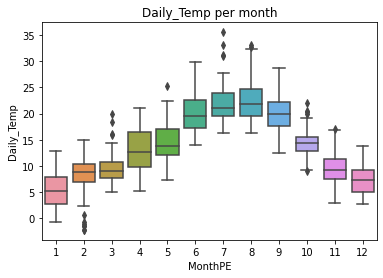

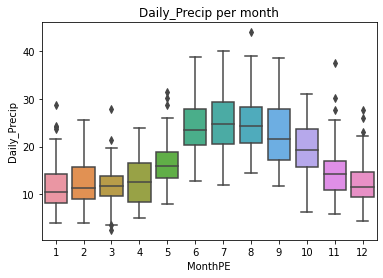

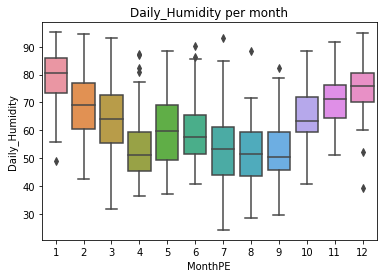

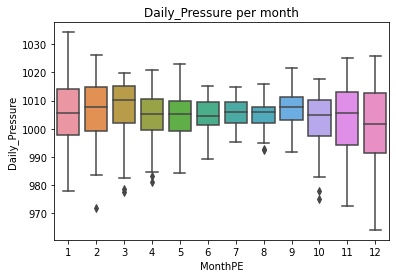

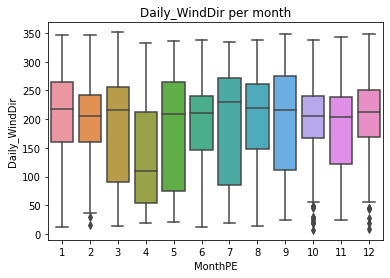

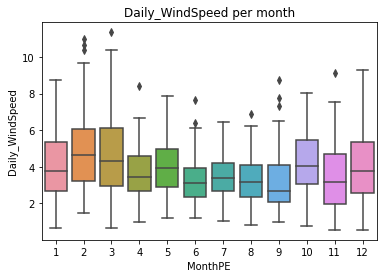

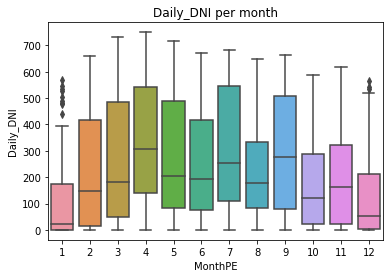

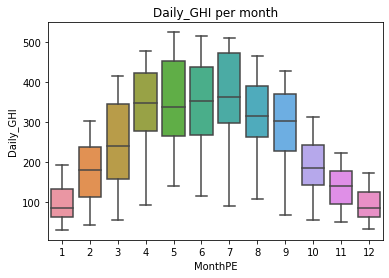

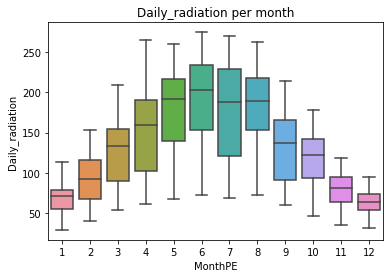

In [22]:
# Create monthly boxplots for all the variables
for i in num_col:
  sns.boxplot(data=df, x='MonthPE', y=i)
  plt.title(f"{i} per month")
  plt.show();

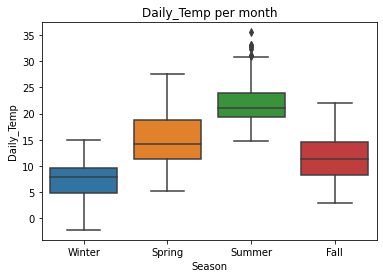

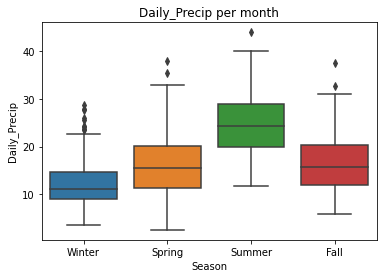

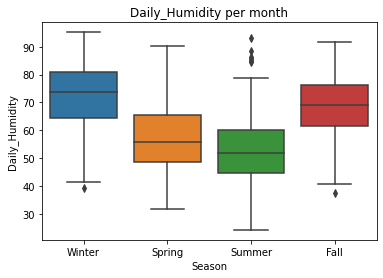

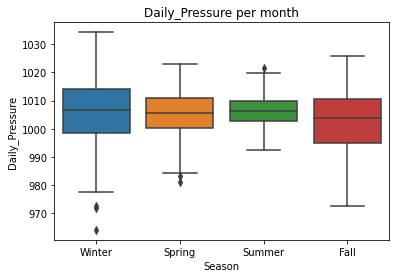

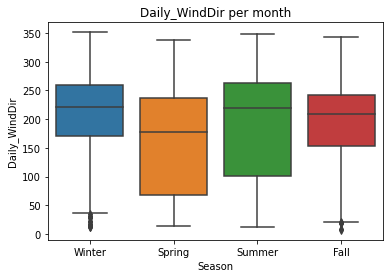

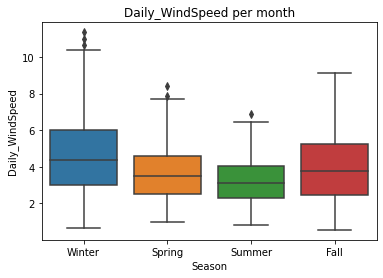

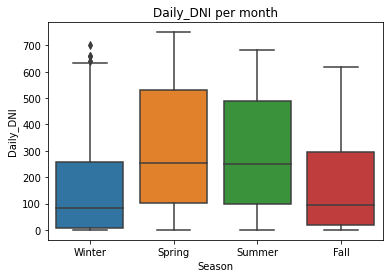

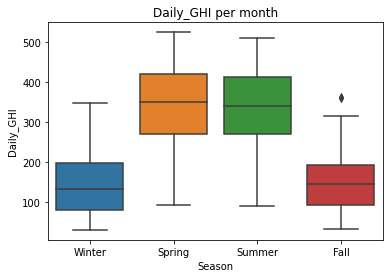

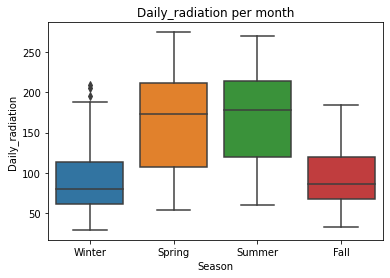

In [23]:
# Create seasonal boxplots for all the variables
for i in num_col:
  sns.boxplot(data=df, x='Season', y=i)
  plt.title(f"{i} per month")
  plt.show();

Here again we observe some seasonality per season / month for daily temperatures, daily precipitations, daily humidity etc...

***Daily radiation vs MonthlyPE***

In [24]:
# Aggregate daily radiation per month
monthly_radiation = df.groupby("MonthPE", as_index=False).agg({"Daily_radiation":"mean"})

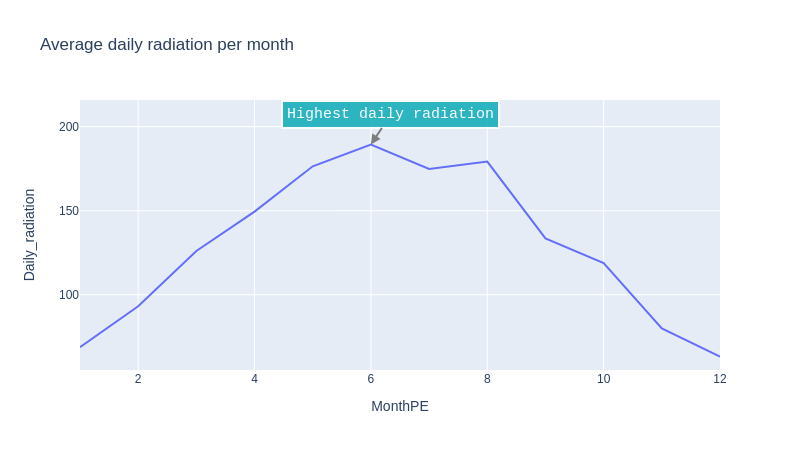

In [25]:
# Plot average daily radiation per month
fig = px.line(monthly_radiation, x='MonthPE', y='Daily_radiation', title="Average daily radiation per month")
fig.add_annotation(
        x=6,
        y=189.3859,
        xref="x",
        yref="y",
        text="Highest daily radiation",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=15,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#ffffff",
        borderwidth=2,
        borderpad=4,
        bgcolor="#00a7b5", #"#ff7f0e"
        opacity=0.8
        )
gitly.show(fig) # to run only to view Plotly graph on Github otherwise replace by fig.show()
#fig.show()

We can observe a peak of daily radiations in June. Daily radiations are at their lowest around December / January

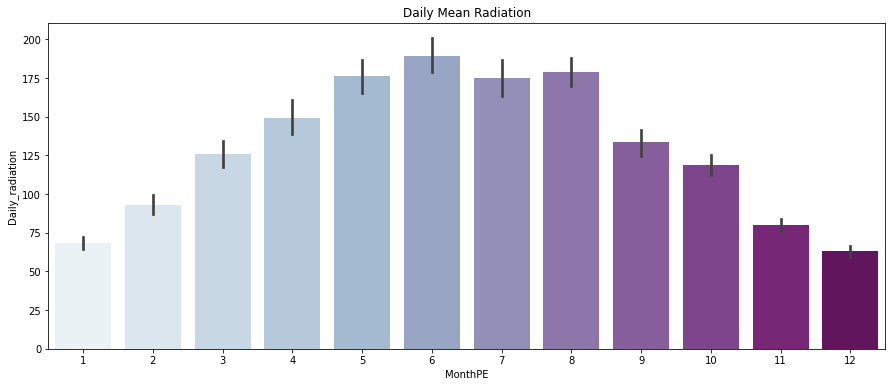

In [26]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

***Correlation table***

In [27]:
# Create correlation table
correlation = df.corr()

In [28]:
# Show correlation table
correlation

MonthPE  Daily_Temp  ...  Daily_GHI  Daily_radiation
MonthPE          1.000000    0.238292  ...  -0.098075        -0.052630
Daily_Temp       0.238292    1.000000  ...   0.652328         0.477571
Daily_Precip     0.269331    0.746974  ...   0.155468         0.458758
Daily_Humidity  -0.060870   -0.595825  ...  -0.798685        -0.225672
Daily_Pressure  -0.107037    0.031697  ...   0.260593        -0.081802
Daily_WindDir    0.046845   -0.012687  ...  -0.258897         0.206790
Daily_WindSpeed -0.149931   -0.221715  ...  -0.248136        -0.052809
Daily_DNI       -0.053145    0.280520  ...   0.769821        -0.252237
Daily_GHI       -0.098075    0.652328  ...   1.000000         0.351267
Daily_radiation -0.052630    0.477571  ...   0.351267         1.000000

[10 rows x 10 columns]

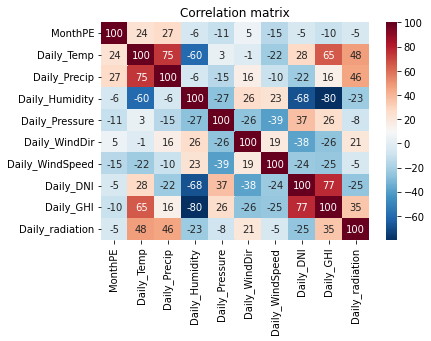

In [29]:
# Plot heatmap of correlations
sns.heatmap(correlation * 100, cmap='RdBu_r',
annot=True,
fmt='.0f')
plt.title('Correlation matrix') 
plt.show();

We observe very little correlations between Daily Radiation and other  variables.

However, we observe strong correlation between:
- Daily temperature and Daily Precipitation 
- Daily temperature and Daily Humidity (negative correlation)
- Daily temperatures and Daily GHI
- Daily Humidity and Daily DNI (negative correlation)
- Daily Humidity and Daily GHI (negative correlation)
- Daily GHI and Daily DNI

... a mild correlation between:
- Daily DNI/ GHI and Daily radiation

The scatter matrix below allows to see visually correlations between all features.

<Figure size 2160x2160 with 0 Axes>

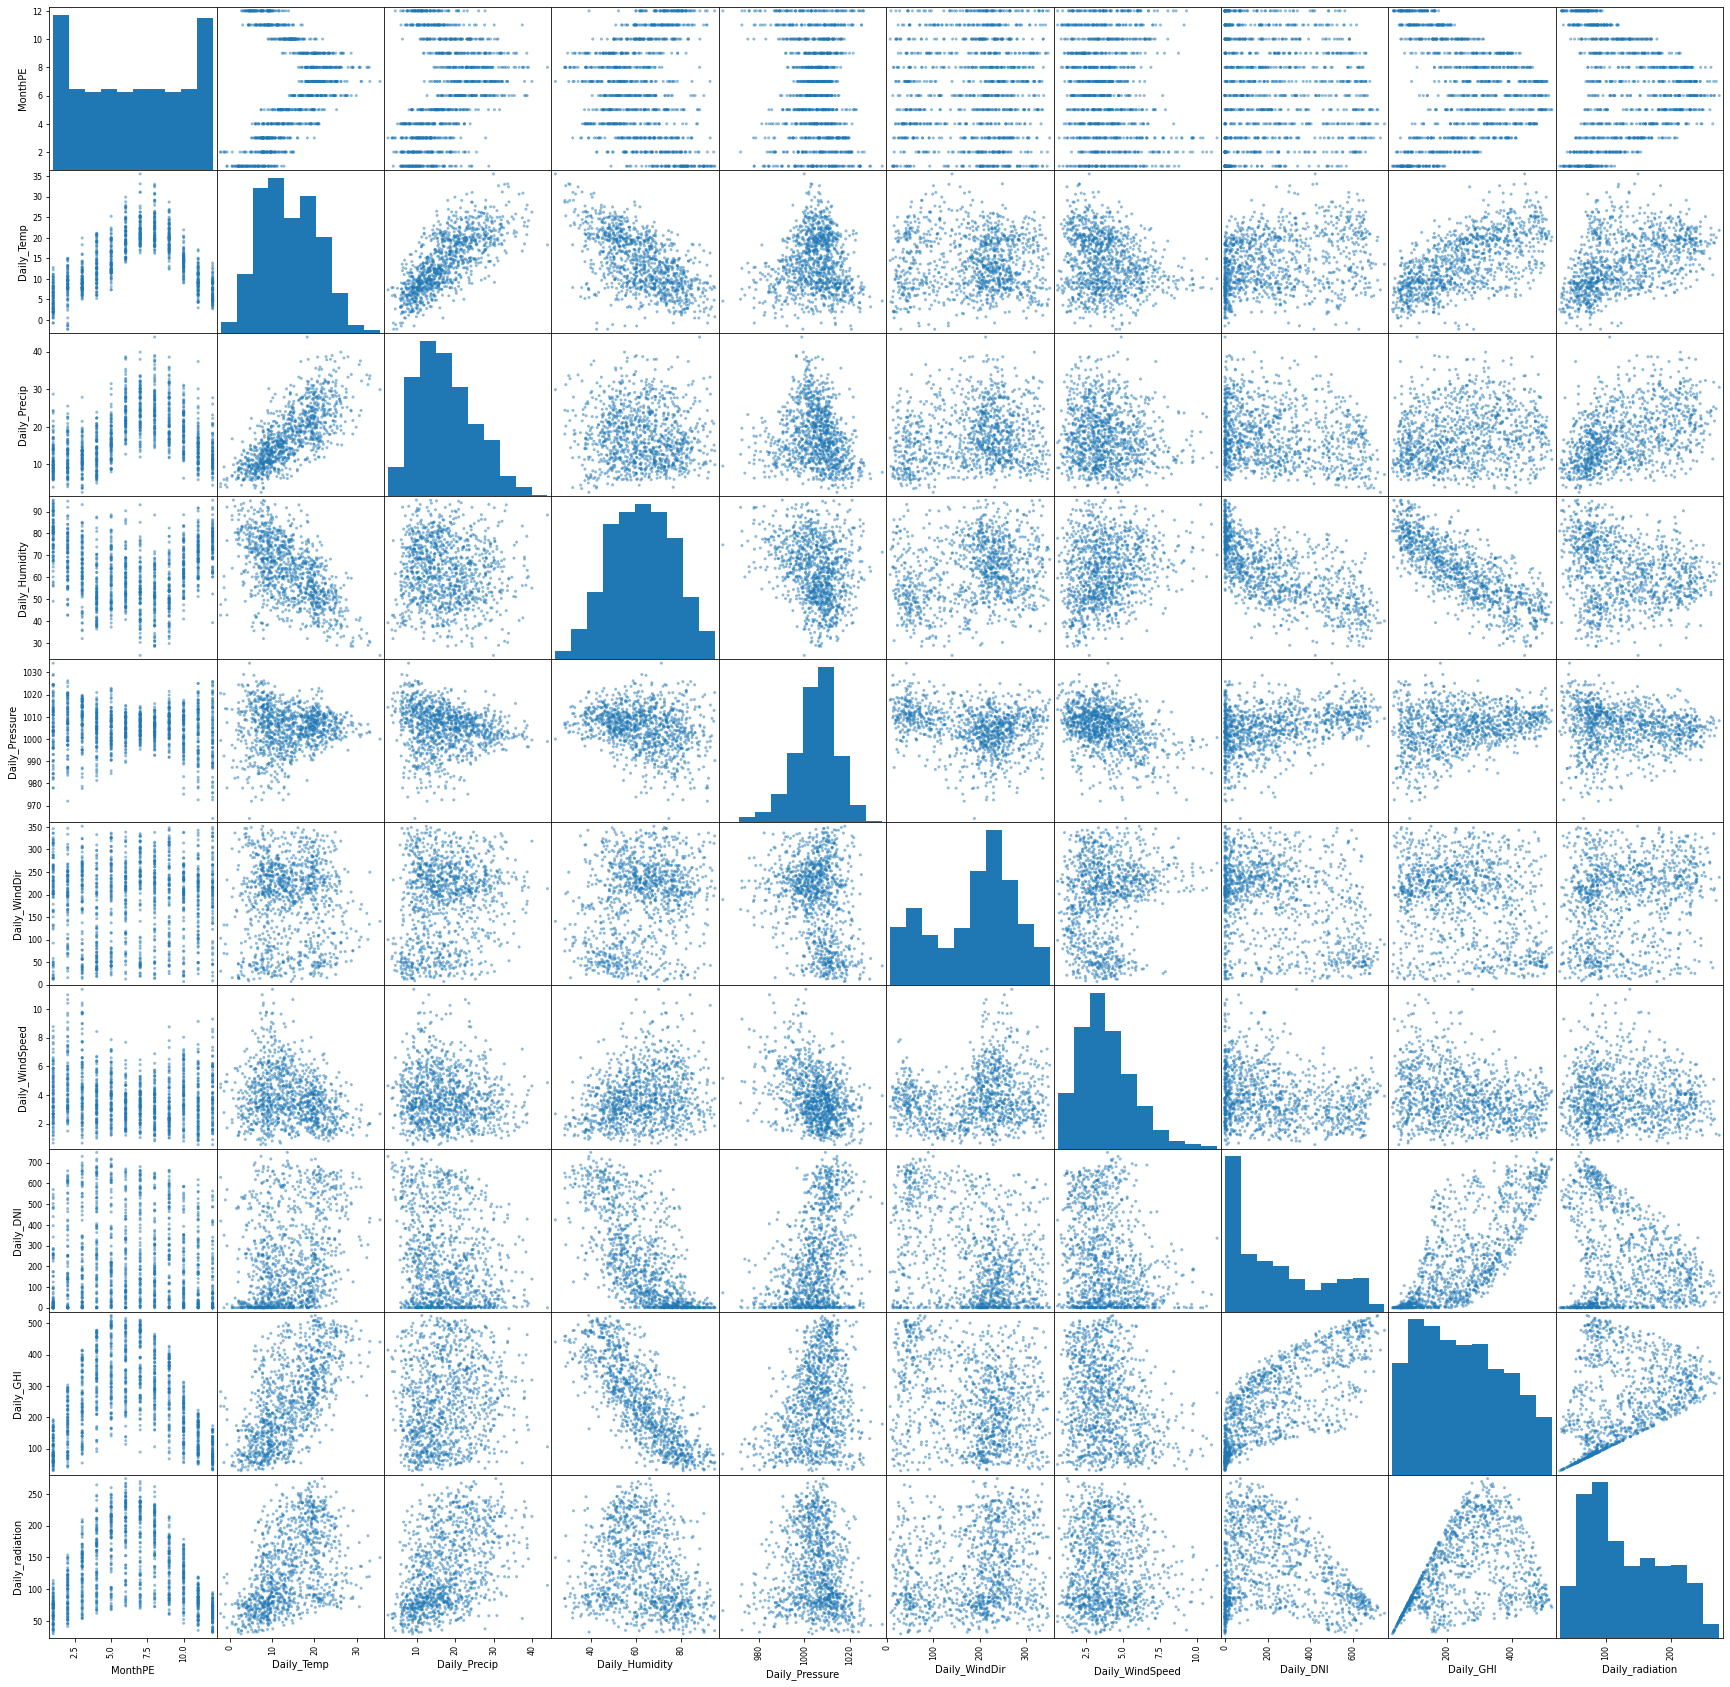

In [30]:
# Plot scatter matrix
plt.figure(figsize=(30,30)) # AGRANDIR
scatter_matrix(df, figsize=(30,30))
plt.show();

### c) Statistical check: stationary or non-stationary

In [31]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
# Create a function to perform the ADFULLER test for stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [32]:
# Perform the ADF stationart test on Daily radiation
adf_test(df['Daily_radiation'],title='Test ADF Daily radiation')

Augmented Dickey-Fuller Test: Test ADF Daily radiation
ADF test statistic        -2.974450
p-value                    0.037350
# lags used               13.000000
# observations          1073.000000
critical value (1%)       -3.436459
critical value (5%)       -2.864237
critical value (10%)      -2.568206
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The ADF test statistic is inferior to 5% of our critical values. We can say with 95% confidence that our data is stationary.

### d) Time series decomposition

We will now decompose our time series into its 3 components: trend, seasonality and noise.

<Figure size 1800x720 with 0 Axes>

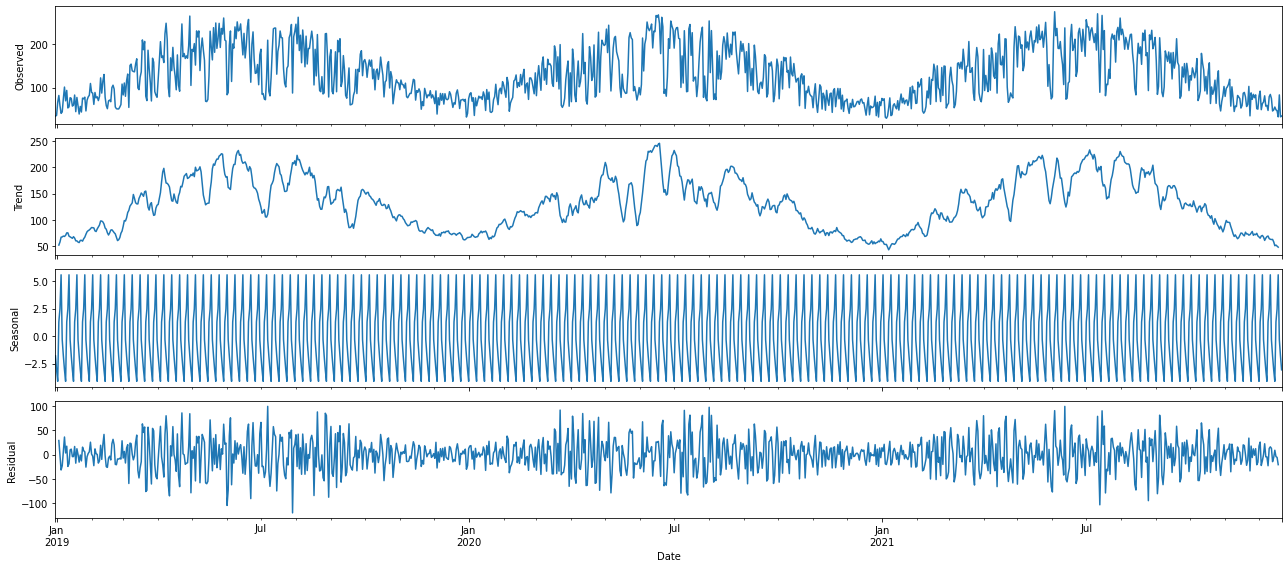

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
# Decompose and plot our time series components
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
seasonality=seasonal_decompose(df['Daily_radiation'], model='additive')
rcParams['figure.figsize'] = 18 , 8
plt.figure(figsize=(25,10))
seasonality.plot()
plt.show()

The seasonal decomposition separated the trend, seasonality and residuals from the actual graph.

Let us try to zoom in on 2019 and perform a seasonal decomposition.

<Figure size 1800x720 with 0 Axes>

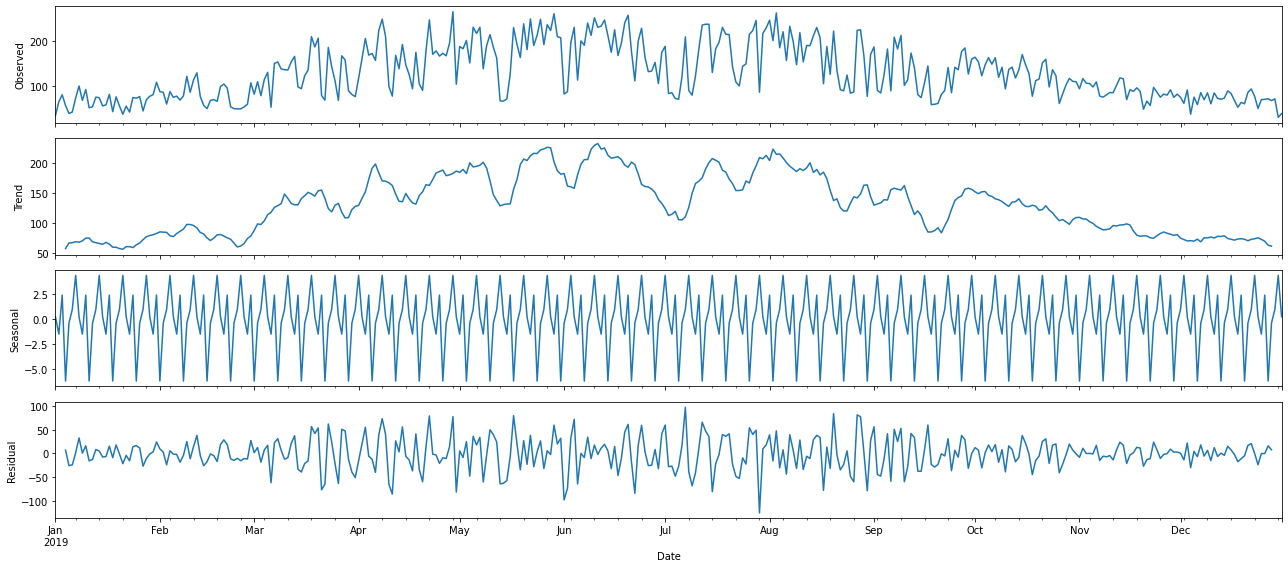

In [34]:
# Decompose and plot our time series components
seasonality=seasonal_decompose(df['Daily_radiation']['2019-01-01':'2019-12-31'], model='additive')
rcParams['figure.figsize'] = 18 , 8
plt.figure(figsize=(25,10))
seasonality.plot()
plt.show()